In [7]:
import numpy as np
import pandas as pd
import sympy as sp
import matplotlib.pyplot as plt
import tkinter as tk

In [8]:
def pl_N(lx,ly):
    x = inputdata[0]
    y = inputdata[1]
    n = len(y)
    B = [inputdata[1]]
    b = [y[0]]
    for i in range(1, n):
        B.append([])
        for j in range(n - i):
            f_n = (B[i-1][j+1] - B[i-1][j])/(x[j+i] - x[j])
            B[i].append(f_n)
        b.append(B[i][0])
    
    K_P = [[1.0]]
    for i in range(0,n-1):
        vtr1 = np.array(K_P[i])
        vtr2 = np.array(K_P[i])
        vtr1 = np.insert(vtr1,0,0)
        vtr2 = np.append(vtr2,0)
        row = vtr1 - vtr2 * x[i]
        K_P.append(row)
        
    P =[]
    for i in range(0,n):
        c = 0.0
        for j in range(i,n):
            c = c + b[j]*K_P[j][i]
        P.append(c)
    pd.DataFrame(P, index = ("x^0","x^1","x^2","x^3","x^4","x^5"))
    P.reverse()
    return(P)     

# Лабораторная работа 2

## Васин Антон - Вариант 11

In [53]:
inputdata = [[0.87287,1.22173,1.57080,1.91986,2.26893,2.61799],[0.00161,0.01550,0.09139,0.39329,1.35729,3.97819]]
pd.DataFrame(inputdata, columns=["1","2","3","4","5","6"], index=["X","Y"])

,1,2,3,4,5,6
X,0.87287,1.22173,1.57080,1.91986,2.26893,2.61799
Y,0.00161,0.01550,0.09139,0.39329,1.35729,3.97819


## Определим Коэффициенты полинома Ньютона $b_1

In [54]:
x = inputdata[0]
y = inputdata[1]
n = len(y)
B = [inputdata[1]]
b = [y[0]]
for i in range(1, n):
    B.append([])
    for j in range(n - i):
        f_n = (B[i-1][j+1] - B[i-1][j])/(x[j+i] - x[j])
        B[i].append(f_n)
    b.append(B[i][0])
pd.DataFrame(b,index = ["b0","b1","b2","b3","b4","b5"], columns = ["indexs"])
#print(*b, sep = ";  ")

,indexs
b0,0.001610
b1,0.039815
b2,0.254454
b3,0.642802
b4,0.763546
b5,0.461142


## Определим коэфициенты полинома

In [55]:
K_P = [[1.0]]
for i in range(0,n-1):
    vtr1 = np.array(K_P[i])
    vtr2 = np.array(K_P[i])
    vtr1 = np.insert(vtr1,0,0)
    vtr2 = np.append(vtr2,0)
    row = vtr1 - vtr2 * x[i]
    #print(*row)
    K_P.append(row)
pd.DataFrame(K_P, columns = ("$x^5$","$x^4$","$x^3$","$x^2$","$x^1$","$x^0$"),
             index = ["$b_0$","$b_1$","$b_2$","$b_3$","$b_4$","$b_5$"]) 

,$x^5$,$x^4$,$x^3$,$x^2$,$x^1$,$x^0$
$b_0$,1.000000,NaN,NaN,NaN,NaN,NaN
$b_1$,-0.872870,1.000000,NaN,NaN,NaN,NaN
$b_2$,1.066411,-2.094600,1.000000,NaN,NaN,NaN
$b_3$,-1.675119,4.356609,-3.665400,1.000000,NaN,NaN
$b_4$,3.215994,-10.039199,11.393664,-5.585260,1.00000,NaN
$b_5$,-7.296866,25.994233,-35.890625,24.066228,-7.85419,1.0


In [56]:
P =[]
for i in range(0,n):
    c = 0.0
    for j in range(i,n):
        c = c + b[j]*K_P[j][i]
    P.append(c)
P.reverse()
pd.DataFrame(P, index = ("$x^5$","$x^4$","$x^3$","$x^2$","$x^1$","$x^0$"))

,0
$x^5$,0.461142
$x^4$,-2.858353
$x^3$,7.476153
$x^2$,-9.952768
$x^1$,6.628922
$x^0$,-1.747894


In [57]:
for x_k in x:
    x_k = 1.5708
    y_k = 0
    for i in range(6):
        y_k +=P[i] * x_k **(5-i)
    print(y_k)
    

0.09139000000000852
0.09139000000000852
0.09139000000000852
0.09139000000000852
0.09139000000000852
0.09139000000000852


## Построение графика многочлена

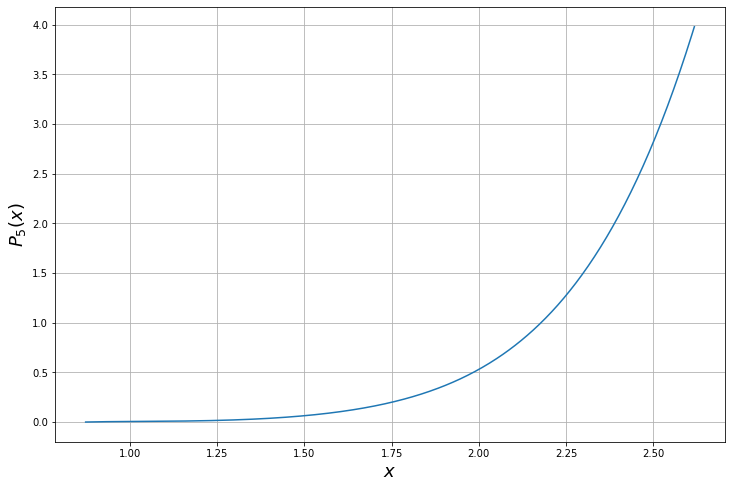

In [58]:
x_s = np.linspace(x[0], x[-1], 500)

plt.figure(figsize=(12, 8))
plt.plot(x_s, np.polyval(P, x_s))
plt.xlabel('$x$', fontsize=18)
plt.ylabel(f'$P_{len(x) - 1}(x)$', fontsize=18)
plt.grid()

## Вычисление сплайнов

In [59]:
def Splain(i,p):
    P_i = np.polyval(p, x[i])
    P_i1 = np.polyval(p, x[i+1])
    
    p_d = np.polyder(p)
    dP_i = np.polyval(p_d, x[i])
    dP_i1 = np.polyval(p_d, x[i+1])
    
    a_3 = (dP_i1*(x[i+1] - x[i]) - 2*(y[i+1] - y[i]) + dP_i*(x[i+1] - x[i])) / (x[i+1] - x[i])**3
    a_2 = (-dP_i1*(x[i+1] - x[i])*(x[i+1] + 2*x[i]) + 3*(y[i+1] - y[i])*(x[i+1] + x[i])
           - dP_i*(x[i+1] - x[i])*(x[i] + 2*x[i+1])) / (x[i+1] - x[i])**3
    a_1 = (dP_i1*x[i]*(2*x[i+1] + x[i])*(x[i+1] - x[i]) - 6*(y[i+1] - y[i])*x[i]*x[i+1]
           + dP_i*x[i+1]*(x[i+1] + 2*x[i])*(x[i+1] - x[i])) / (x[i+1] - x[i])**3
    a_0 = (-dP_i1*(x[i]**2)*x[i+1]*(x[i+1] - x[i]) + y[i+1]*(x[i]**2)*(3*x[i+1] - x[i])
           + y[i]*(x[i+1]**2)*(x[i+1] - 3*x[i]) - dP_i*x[i]*(x[i+1]**2)*(x[i+1] - x[i])) / (x[i+1] - x[i])**3

    return np.array([a_3, a_2, a_1, a_0])

In [60]:
V_Sp = []
for i in range(len(x) - 1):
    V_Sp.append(Splain(i,P))
V_Sp = np.array(V_Sp)

## Построим График сплайнов и Полинома Ньютона

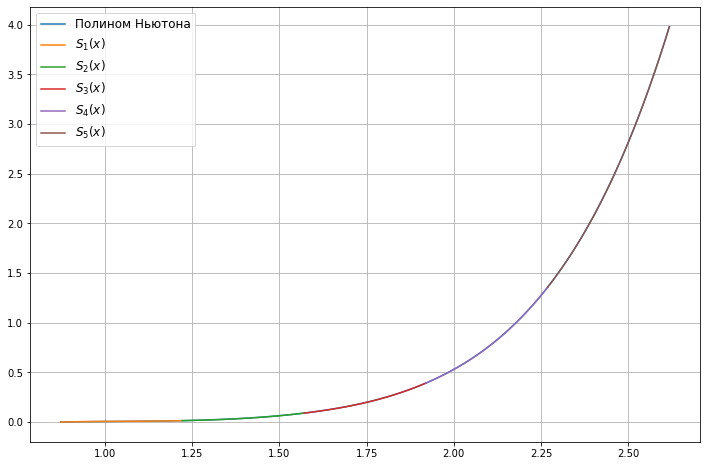

In [61]:
x_p = np.linspace(x[0], x[-1], 250)
x_s = []
for i in range(1, len(x)):
    x_s.append(np.linspace(x[i-1], x[i], 50))

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(x_p, np.polyval(P, x_p), label='Полином Ньютона')
for i in range(len(x)-1):
    ax.plot(x_s[i], np.polyval(V_Sp[i], x_s[i]), label=f'$S_{i+1}(x)$')
    
ax.legend(fontsize=12)
ax.grid()
